Problems and Tasks:

1)     Use the us_contagious_disease.csv to create an object that stores only the Measles data, includes a per 100,000 people rate, and removes Alaska and Hawaii since they only became states in the late 50s. Note that there is a weeks_reporting column. Take that into account when computing the rate.

2)     Plot the Measles disease rate per year for California. Find out when the Measles vaccine was introduced and add a vertical line to the plot to show this year. Seaborn for Python is recommended for plots

3)     Note these rates start off as counts. For larger counts we can expect more variability. There are statistical explanations for this which we don't discuss here. But transforming the data might help stabilize the variability such that it is closer across levels. For 1950, 1960, and 1970, plot the histogram of the data across states with and without the square root transformation. Which seems to have more similar variability across years? Make sure to pick binwidths that result in informative plots.

4)     Plot the Measles disease rate per year for California. Use the square root transformation. Find out when the Measles vaccine was introduced and add a vertical line to the plot to show this year. Does the pattern hold for other states? Use boxplots to get an idea of the distribution of rates for each year and see if the pattern holds across states. One problem with the boxplot is that it does not let us see state-specific trends. Make a plot showing the trends for all states. Add the US average to the plot.

a)      Note 1: Note there are missing values in the data.

b)     Note 2: Experiment with different plots  to distinguish states from each other and to make the whole plot more readable.

5)     Prove hypotheses on effectiveness of vaccines for different diseases (at least 3 including the Measles disease). Use appropriate tests and provide statistical significance of your tests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

1. Use the us_contagious_disease.csv to create an object that stores only the Measles data, includes a per 100,000 people rate, and removes Alaska and Hawaii since they only became states in the late 50s. Note that there is a weeks_reporting column. Take that into account when computing the rate.

In [2]:
#import diseases data
df = pd.read_csv('./data/us_contagious_diseases.csv',encoding = "ISO-8859-1",index_col = 0)
df.head()


,disease,state,year,weeks_reporting,count,population
1,Hepatitis A,Alabama,1966,50,321,3345787.0
2,Hepatitis A,Alabama,1967,49,291,3364130.0
3,Hepatitis A,Alabama,1968,52,314,3386068.0
4,Hepatitis A,Alabama,1969,49,380,3412450.0
5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [3]:
#statistical summary of the data imported
df.describe()

,year,weeks_reporting,count,population
count,16065.000000,16065.00000,16065.000000,1.585100e+04
mean,1970.949206,37.37535,1492.504886,4.107584e+06
std,23.034384,17.54475,5884.533129,4.669852e+06
min,1928.000000,0.00000,0.000000,8.685300e+04
25%,1950.000000,31.00000,7.000000,1.018755e+06
50%,1975.000000,46.00000,69.000000,2.749249e+06
75%,1990.000000,50.00000,525.000000,4.996229e+06
max,2011.000000,52.00000,132342.000000,3.760752e+07


We observe that there are rows with zero weeks_reported throughout a year, they are filtered out below to enable rate calculation, as well Hawaii and Alaska states data are deleted since they became states in the late 1950's

In [4]:
df2 = df.query("state != 'Alaska' & state != 'Hawaii' & weeks_reporting != 0 ")
df2[df2['state'] == 'Alaska']
df2[df2['state'] == 'Hawaii']

,disease,state,year,weeks_reporting,count,population


In [5]:
#confirms if zero data for weeks_reporting column has been erased

df2.describe()

,year,weeks_reporting,count,population
count,13866.000000,13866.000000,13866.000000,1.386600e+04
mean,1969.567359,42.226309,1722.826626,4.345937e+06
std,23.136194,12.124376,6302.023561,4.820889e+06
min,1928.000000,1.000000,0.000000,8.685300e+04
25%,1948.000000,38.000000,18.000000,1.204026e+06
50%,1973.000000,47.000000,115.000000,2.896879e+06
75%,1989.000000,51.000000,706.000000,5.272114e+06
max,2011.000000,52.000000,132342.000000,3.760752e+07


Now after minimum data available for the weeks_reporting column is 1, we go ahead to extract data for measles disease only.

In [6]:
measles = df2.query("disease == 'Measles'")
measles.head()

,disease,state,year,weeks_reporting,count,population
2347,Measles,Alabama,1928,52,8843,2589923.0
2348,Measles,Alabama,1929,49,2959,2619131.0
2349,Measles,Alabama,1930,52,4156,2646248.0
2350,Measles,Alabama,1931,49,8934,2670818.0
2351,Measles,Alabama,1932,41,270,2693027.0


In [7]:
measles.isnull().any()

disease            False
state              False
year               False
weeks_reporting    False
count              False
population         False
dtype: bool

In [8]:
#Adding a disease rate per 100000 column to measles data frame
measles['disease rate'] = ((measles['count']/measles['weeks_reporting'])*52)/(measles['population']/100000)
measles.head()

C:\Users\godfr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,disease,state,year,weeks_reporting,count,population,disease rate
2347,Measles,Alabama,1928,52,8843,2589923.0,341.438722
2348,Measles,Alabama,1929,49,2959,2619131.0,119.893326
2349,Measles,Alabama,1930,52,4156,2646248.0,157.052551
2350,Measles,Alabama,1931,49,8934,2670818.0,354.984113
2351,Measles,Alabama,1932,41,270,2693027.0,12.715766


In [9]:
#california data

california = measles.query("state == 'California'")
california.head()

,disease,state,year,weeks_reporting,count,population,disease rate
2647,Measles,California,1928,52,3698,5230775.0,70.696981
2648,Measles,California,1929,52,4024,5465979.0,73.619017
2649,Measles,California,1930,52,43416,5677251.0,764.736313
2650,Measles,California,1931,52,27807,5856343.0,474.818500
2651,Measles,California,1932,52,12618,6004994.0,210.125106


2. Plot the Measles disease rate per year for California. Find out when the Measles vaccine was introduced and add a vertical line to the plot to show this year. Seaborn for Python is recommended for plots

Measles was introduced in 1963 by dr. John Enders and his fellows -- https://www.cdc.gov/measles/about/history.html. We will add a red vertical line at this year in the plot below.

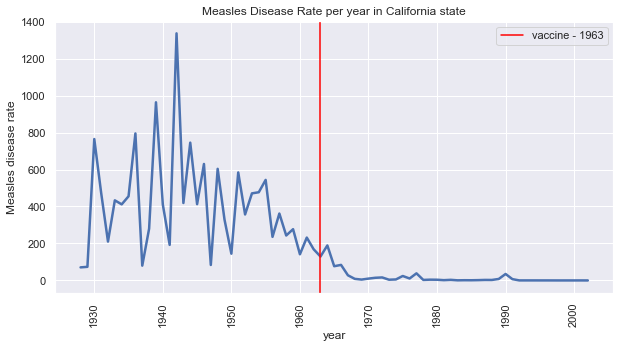

In [10]:
fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=california, linewidth = 2.5, palette="tab10", y="disease rate", x="year")
ax.axvline(1963, 0, california['disease rate'].max(), c = 'red', label = 'vaccine - 1963')
plt.ylabel('Measles disease rate')
plt.title('Measles Disease Rate per year in California state')
_=plt.xticks(rotation = 'vertical')
plt.legend()

3. Note these rates start off as counts. For larger counts we can expect more variability. There are statistical explanations for this which we don't discuss here. But transforming the data might help stabilize the variability such that it is closer across levels. For 1950, 1960, and 1970, plot the histogram of the data across states with and without the square root transformation. Which seems to have more similar variability across years? Make sure to pick binwidths that result in informative plots.

In [11]:
measles['sqrt count'] = measles['count']**0.5
measles.head()

C:\Users\godfr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,disease,state,year,weeks_reporting,count,population,disease rate,sqrt count
2347,Measles,Alabama,1928,52,8843,2589923.0,341.438722,94.037227
2348,Measles,Alabama,1929,49,2959,2619131.0,119.893326,54.396691
2349,Measles,Alabama,1930,52,4156,2646248.0,157.052551,64.467046
2350,Measles,Alabama,1931,49,8934,2670818.0,354.984113,94.519839
2351,Measles,Alabama,1932,41,270,2693027.0,12.715766,16.431677


In [12]:
measles_1950 = measles.query("year == 1950")
measles_1960 = measles.query("year == 1960")
measles_1970 = measles.query("year == 1970")

In [13]:
measles_1950[measles_1950['count'] == 0]
measles_1950.head()

,disease,state,year,weeks_reporting,count,population,disease rate,sqrt count
2369,Measles,Alabama,1950,47,1556,3061743.0,56.227185,39.446166
2519,Measles,Arizona,1950,49,2389,749587.0,338.221622,48.877398
2594,Measles,Arkansas,1950,50,1739,1909511.0,94.713254,41.701319
2669,Measles,California,1950,50,14728,10586224.0,144.689173,121.358972
2744,Measles,Colorado,1950,50,5239,1325089.0,411.184456,72.380937


[Text(0.5, 1.0, '1970'),
 Text(0.5, 0, 'Total measles cases-square rooted'),
 Text(0, 0.5, 'Count on states')]

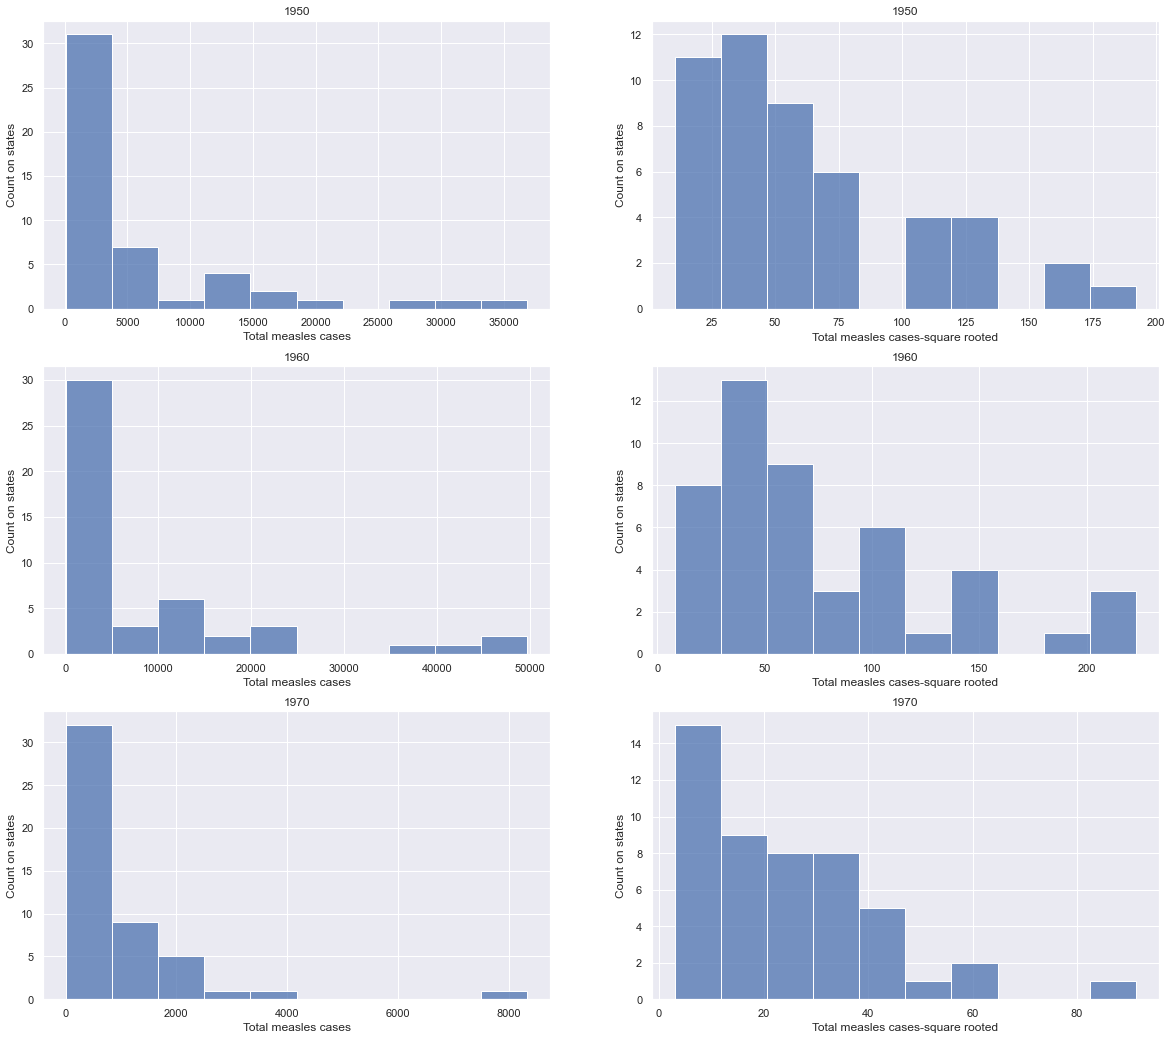

In [49]:
f, ax = plt.subplots(3,2, sharex=False, figsize=(20,18))
sns.histplot(measles_1950, x='count', bins = 10, ax = ax[0,0])
ax[0,0].set(title = "1950",
       xlabel = "Total measles cases", 
       ylabel = "Count on states")
sns.histplot(measles_1950, x='sqrt count', bins = 10, ax = ax[0,1])
ax[0,1].set(title = "1950",
       xlabel = "Total measles cases-square rooted", 
       ylabel = "Count on states")
sns.histplot(measles_1960, x='count', bins = 10, ax = ax[1,0])
ax[1,0].set(title = "1960",
       xlabel = "Total measles cases", 
       ylabel = "Count on states")
sns.histplot(measles_1960, x='sqrt count', bins = 10, ax = ax[1,1])
#sns.distplot(measles_1960['sqrt count'],kde=True,color='blue',hist_kws={"linewidth": 25,'alpha':1},ax=ax[0,1])
ax[1,1].set(title = "1960",
       xlabel = "Total measles cases-square rooted", 
       ylabel = "Count on states")
sns.histplot(measles_1970, x='count', bins = 10, ax = ax[2,0])
ax[2,0].set(title = "1970",
       xlabel = "Total measles cases", 
       ylabel = "Count on states")
sns.histplot(measles_1970, x='sqrt count', bins = 10, ax = ax[2,1])
ax[2,1].set(title = "1970",
       xlabel = "Total measles cases-square rooted", 
       ylabel = "Count on states")

As the histogram plots show, the data variability is less for the transformed data. For untransformed data there is a huge gap between larger and smaller counts. Transformed data shows similar variability than untransformed data. Lets observe the effect of data transformation for each state by plotting a bar graph for transformed and non-transformed data. 

In [15]:
#add column for square root for measles disease rate

measles['sqrt disease rate'] = measles['disease rate']**0.5
measles_1950 = measles.query("year == 1950")
measles_1960 = measles.query("year == 1960")
measles_1970 = measles.query("year == 1970")
measles.head()

C:\Users\godfr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,disease,state,year,weeks_reporting,count,population,disease rate,sqrt count,sqrt disease rate
2347,Measles,Alabama,1928,52,8843,2589923.0,341.438722,94.037227,18.478061
2348,Measles,Alabama,1929,49,2959,2619131.0,119.893326,54.396691,10.949581
2349,Measles,Alabama,1930,52,4156,2646248.0,157.052551,64.467046,12.532061
2350,Measles,Alabama,1931,49,8934,2670818.0,354.984113,94.519839,18.841022
2351,Measles,Alabama,1932,41,270,2693027.0,12.715766,16.431677,3.565917


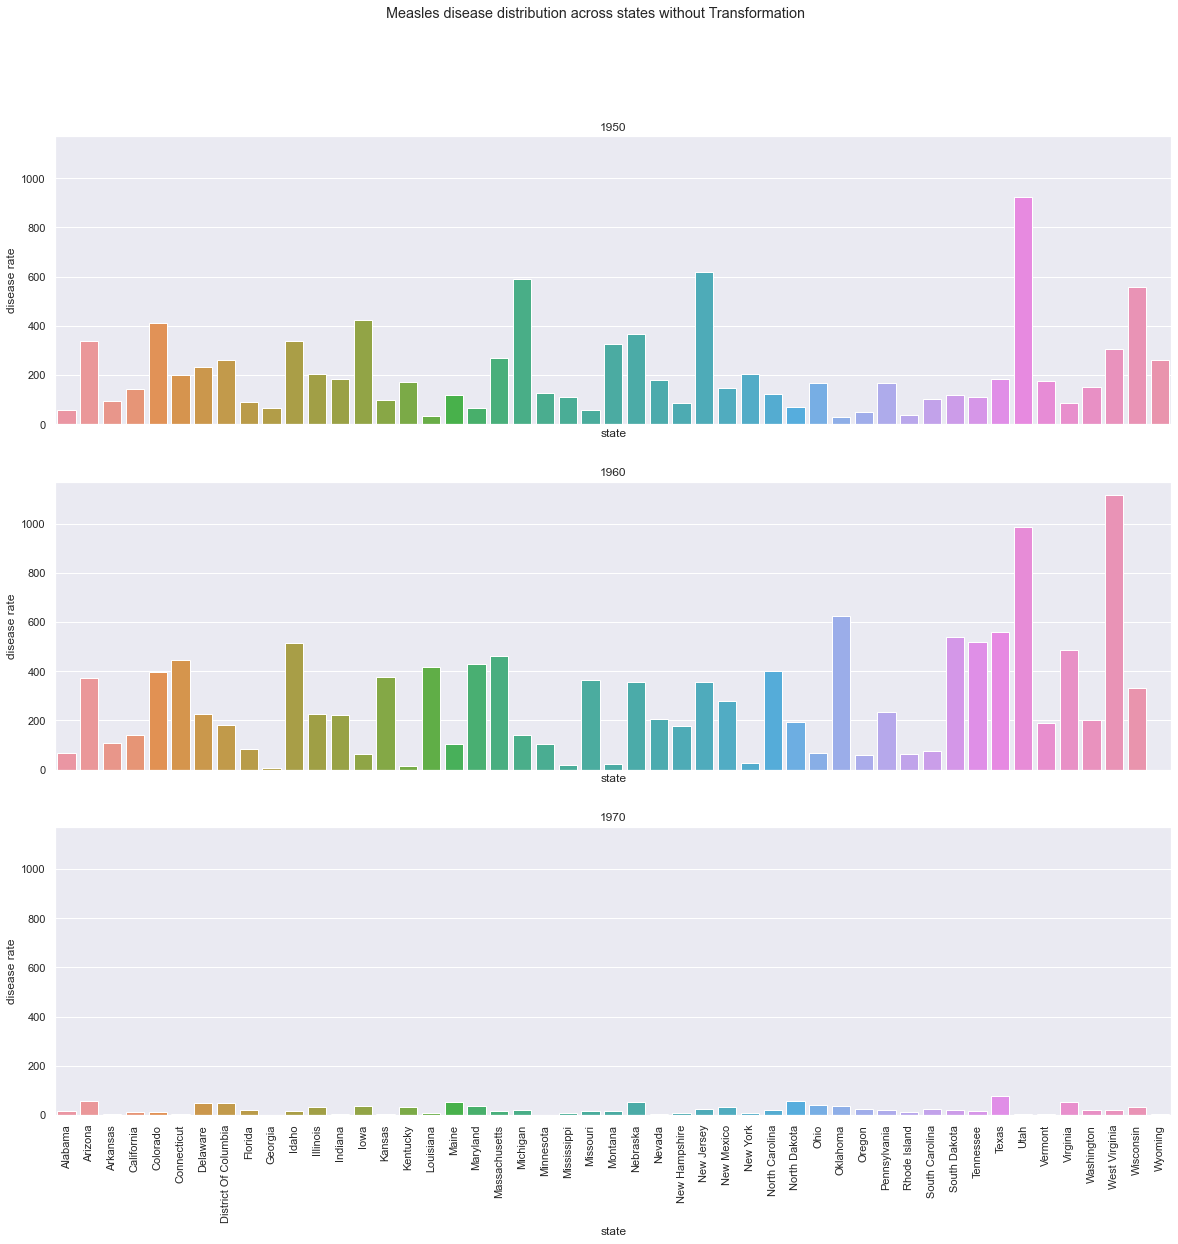

In [16]:
f, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(20,18))
f.suptitle("Measles disease distribution across states without Transformation")
sns.barplot(data=measles_1950, x='state', y='disease rate', ax=ax[0])
ax[0].set(title = "1950")
sns.barplot(data=measles_1960, x='state', y='disease rate', ax=ax[1])
ax[1].set(title = "1960")
sns.barplot(data=measles_1970, x='state', y='disease rate', ax=ax[2])
ax[2].set(title = "1970")
_=plt.xticks(rotation = 'vertical')

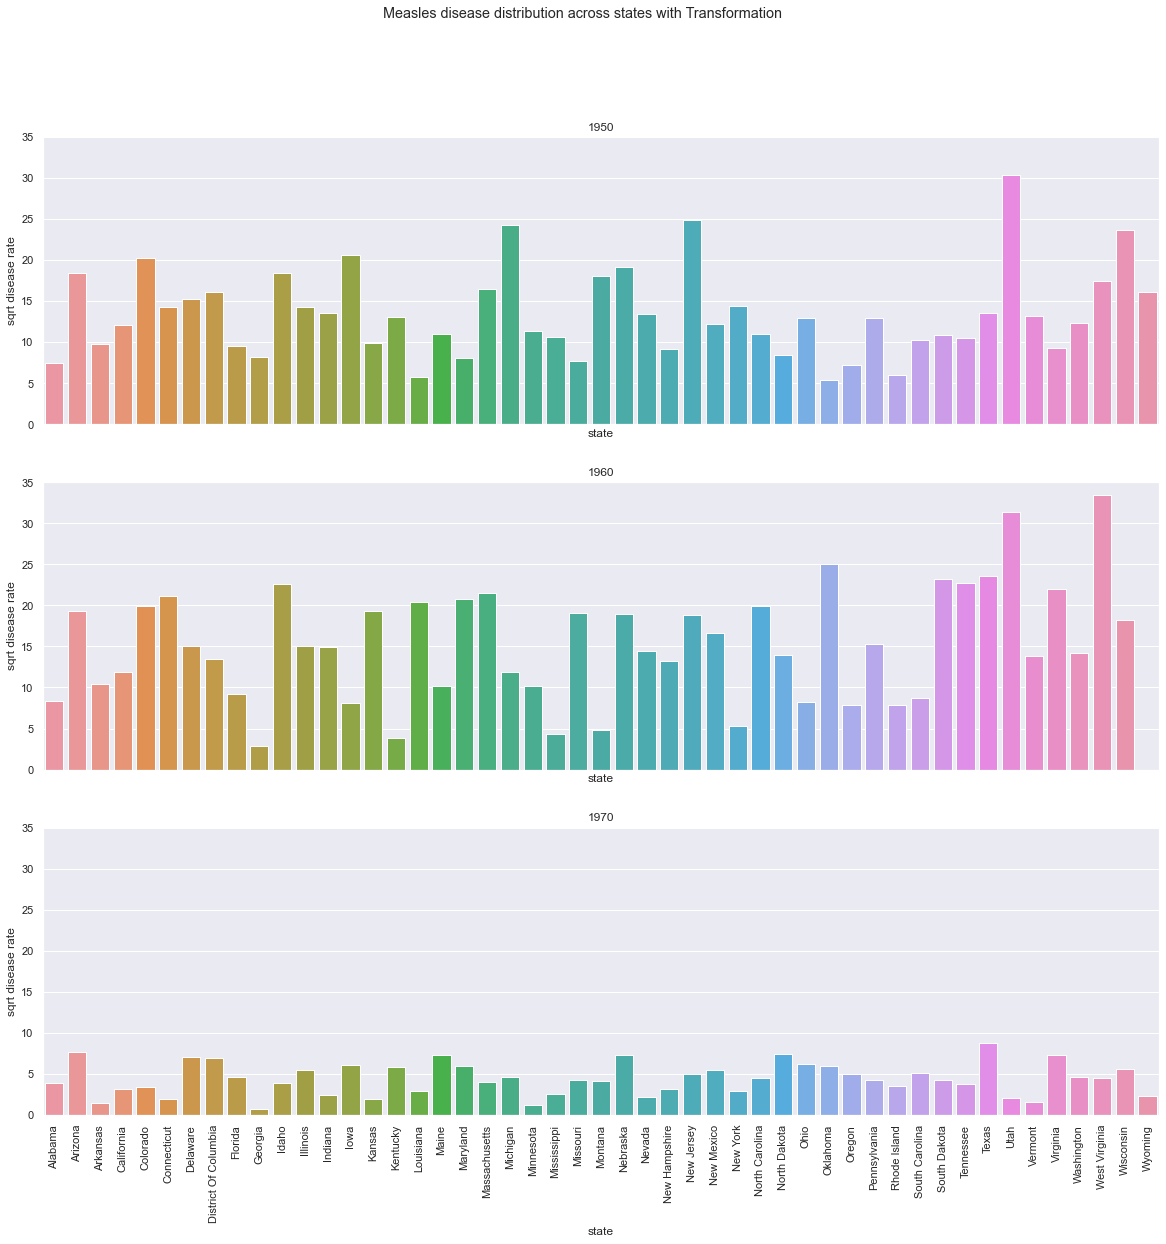

In [17]:
f, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(20,18))
f.suptitle("Measles disease distribution across states with Transformation")
sns.barplot(data=measles_1950, x='state', y='sqrt disease rate', ax=ax[0])
ax[0].set(title = "1950")
sns.barplot(data=measles_1960, x='state', y='sqrt disease rate', ax=ax[1])
ax[1].set(title = "1960")
sns.barplot(data=measles_1970, x='state', y='sqrt disease rate', ax=ax[2])
ax[2].set(title = "1970")
_=plt.xticks(rotation = 'vertical')

Effects of the square root transformation can also be seen by looking at the bar plot of each state for 1950, 1960, and 1970.The disease rate were square rooted, we clearly observe the issue of variability of larger and smaller rates being resolved.

4. Plot the Measles disease rate per year for California. Use the square root transformation. Find out when the Measles vaccine was introduced and add a vertical line to the plot to show this year. Does the pattern hold for other states? Use boxplots to get an idea of the distribution of rates for each year and see if the pattern holds across states. One problem with the boxplot is that it does not let us see state-specific trends. Make a plot showing the trends for all states. Add the US average to the plot.

In [18]:
cal = measles.query("state == 'California'")
cal.head()

,disease,state,year,weeks_reporting,count,population,disease rate,sqrt count,sqrt disease rate
2647,Measles,California,1928,52,3698,5230775.0,70.696981,60.811183,8.408150
2648,Measles,California,1929,52,4024,5465979.0,73.619017,63.435006,8.580152
2649,Measles,California,1930,52,43416,5677251.0,764.736313,208.365064,27.653866
2650,Measles,California,1931,52,27807,5856343.0,474.818500,166.754310,21.790330
2651,Measles,California,1932,52,12618,6004994.0,210.125106,112.329871,14.495693


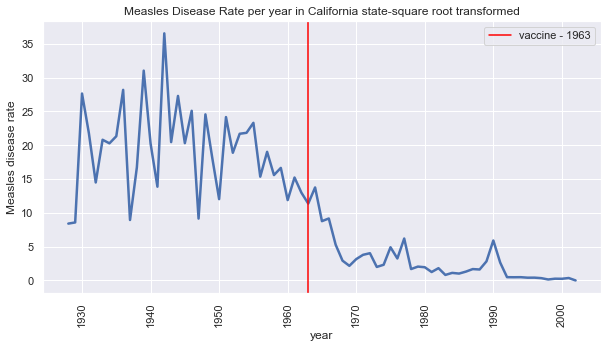

In [19]:
fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=cal, linewidth = 2.5, palette="tab10", y="sqrt disease rate", x="year")
ax.axvline(1963, 0, california['disease rate'].max(), c = 'red', label = 'vaccine - 1963')
plt.ylabel('Measles disease rate')
plt.title('Measles Disease Rate per year in California state-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

Does the pattern hold for other states? Use boxplots to get an idea of the distribution of rates for each year and see if the pattern holds across states.

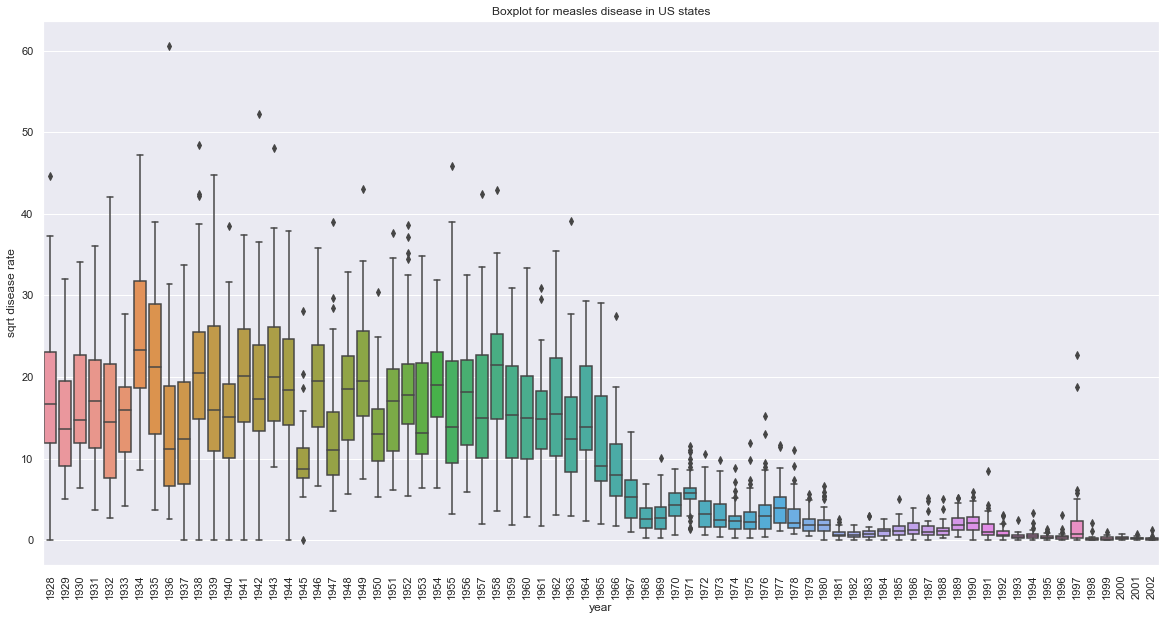

In [20]:
fig = plt.figure(figsize = (20,10))
ax=sns.boxplot(x='year', y = 'sqrt disease rate', data = measles)
plt.title('Boxplot for measles disease in US states')
_=plt.xticks(rotation = 'vertical')

The box plot gives an overview on the trend for the measles disease rate that, the rate of transmission decreases as years increase but we are not in position to tell the individual state trends. For more clarification state wise, we will draw a heatmap plot. Before heatmap let's draw a line plot to show all states and their average rate.

In [21]:
us_average = measles.groupby('year').mean()
us_average.reset_index(inplace=True)

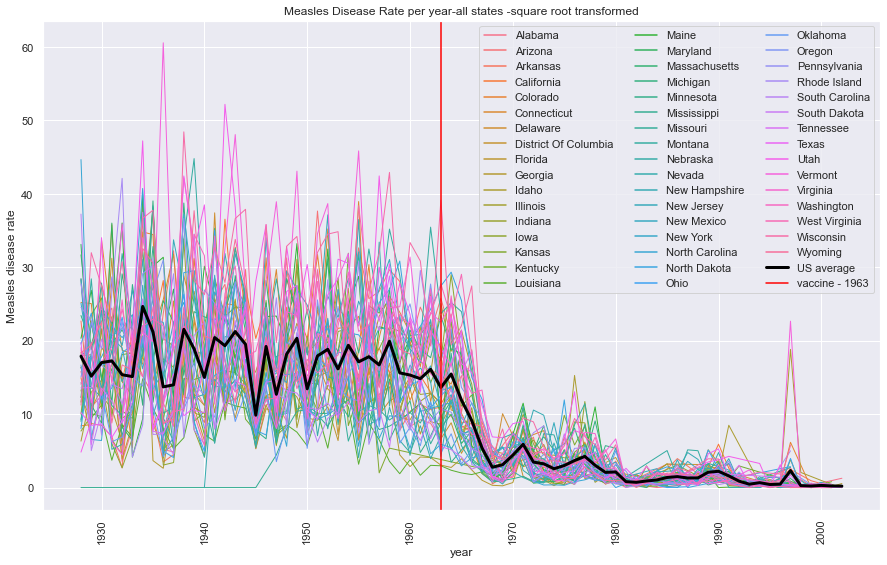

In [22]:
fig = plt.figure(figsize = (15,9))
ax = sns.lineplot(data=measles, y="sqrt disease rate", x="year", estimator=None, lw=1, hue = 'state')
ax.plot(us_average['year'], us_average['sqrt disease rate'], c = 'black', lw=3, label ='US average')
ax.axvline(1963, *ax.get_ylim(), c = 'red', label = 'vaccine - 1963')
plt.ylabel('Measles disease rate')
plt.title('Measles Disease Rate per year-all states -square root transformed')
_=plt.xticks(rotation = 'vertical')
ax.legend(ncol=3)

There are too much colours to interpret from the line plot though it shows each state-trend. Bolded black colour shows the US average. To make a good plot to contain all these three items (disease rate,state and year), heatmap is the best!

In [23]:
#converting data to long format
heatmap_src = measles.pivot("state", "year", "sqrt disease rate").fillna(0)
heatmap_src.head()

year,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
state,,,,,,,,,,,,,,,,,,,,,
Alabama,18.478061,10.949581,12.532061,18.841022,3.565917,8.074618,24.086434,16.687246,5.176003,4.863112,...,0.204784,0.000000,0.000000,0.000000,2.690845,0.000000,0.000000,0.000000,0.000000,1.267962
Arizona,15.819776,9.053340,22.673968,24.447734,5.418230,18.343813,15.233690,12.520202,23.713314,32.258728,...,0.418537,0.747085,0.552867,0.506776,0.528271,1.095067,0.186630,0.000000,0.265272,0.000000
Arkansas,22.690479,8.735836,8.453786,6.950130,2.687092,16.974278,23.774221,9.922172,3.475648,4.493571,...,0.000000,0.000000,0.315635,0.000000,2.468143,0.000000,0.936107,0.527134,0.000000,0.000000
California,8.408150,8.580152,27.653866,21.790330,14.495693,20.814285,20.285311,21.335473,28.197023,8.943697,...,0.471957,0.482793,0.407674,0.413960,0.339635,0.142135,0.257753,0.246171,0.359500,0.000000
Colorado,14.950441,8.618487,33.725237,22.055404,15.477975,5.451750,34.810920,34.466954,7.643214,9.884761,...,0.000000,0.904165,1.079714,0.498642,6.165709,0.000000,0.000000,0.313086,0.000000,0.000000


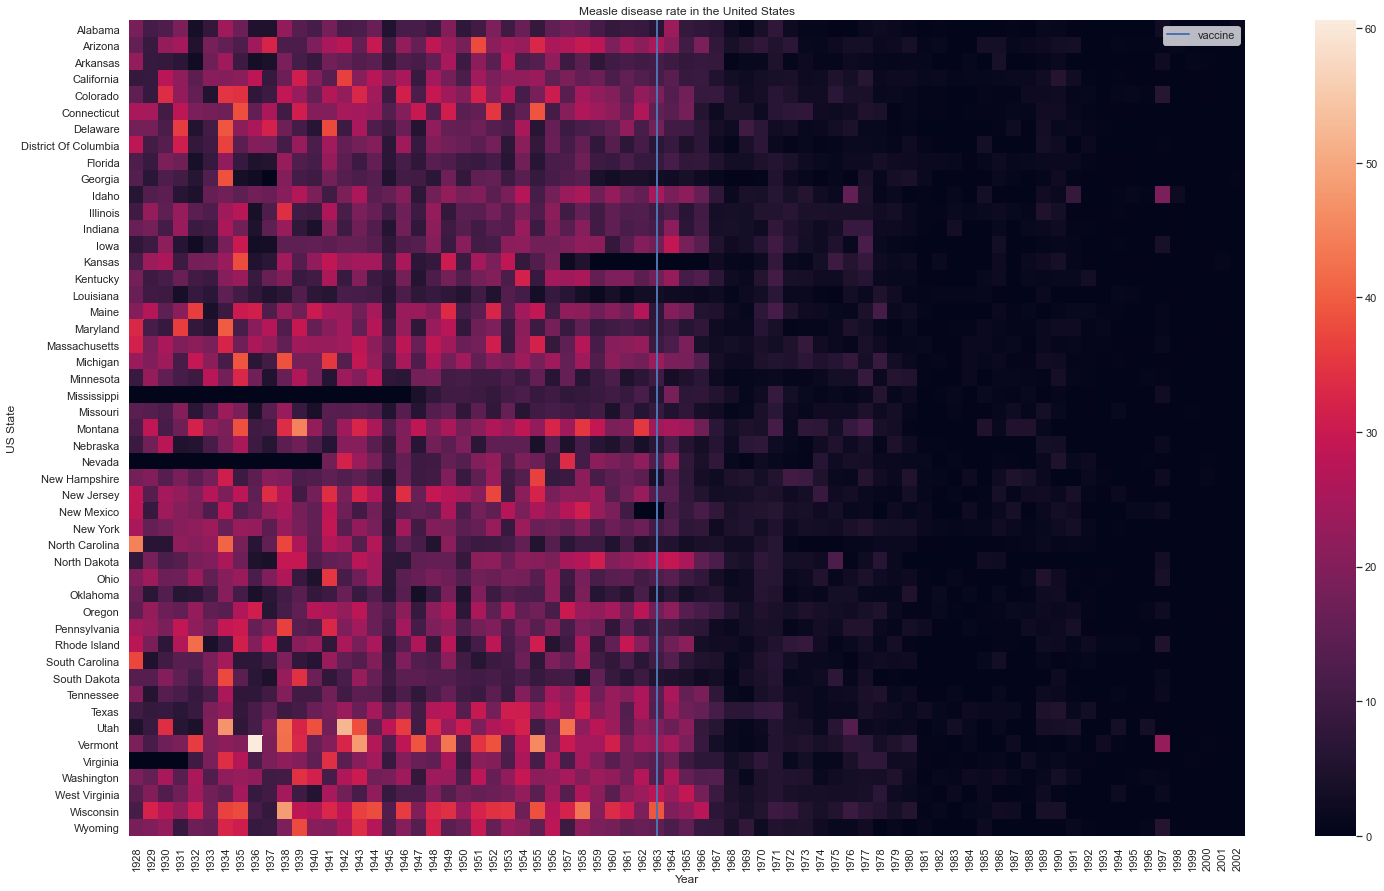

In [24]:
f, ax = plt.subplots(figsize=(25, 15))
ax=sns.heatmap(heatmap_src, annot=False, fmt="d", linewidths=0, ax=ax)
ax.set(xlabel="Year", ylabel="US State", title = "Measle disease rate in the United States")
ax.axvline([35.5],*ax.get_ylim(),lw=2, label = 'vaccine')
plt.legend()
plt.show()

The heatmap plot shows the rate of measles disease for each state in each year. The square root transformation method was adopted to avoid disease rate variations caused by very high and very low data values. We may conclude that after the discovery of vaccine in 1963 measles disease were controlled in US. In 2000's measles was declared eliminated in US. 

5. Prove hypotheses on effectiveness of vaccines for different diseases (at least 3 including the Measles disease). Use appropriate tests and provide statistical significance of your tests.

In [25]:
df2['disease'].unique()

array(['Hepatitis A', 'Measles', 'Mumps', 'Pertussis', 'Polio', 'Rubella',
       'Smallpox'], dtype=object)

Let's analyse the effect of vaccine for the first three diseases (Hepatitis A, Measles and Mumps) using regression techniques

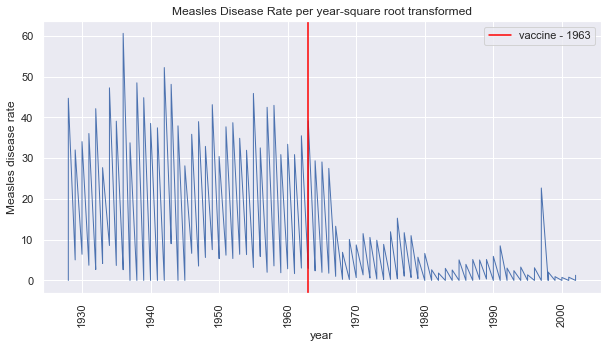

In [26]:
#measles

fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=measles, y="sqrt disease rate", x="year", estimator=None, lw=1)
ax.axvline(1963, *ax.get_ylim(), c = 'red', label = 'vaccine - 1963')
plt.ylabel('Measles disease rate')
plt.title('Measles Disease Rate per year-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

In [27]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(measles['year'],measles['sqrt disease rate'])
r_value**2
slope

-0.32995510910124887

In [28]:
def linear(x):
    return slope*x + intercept

fitline = linear(measles['year'])

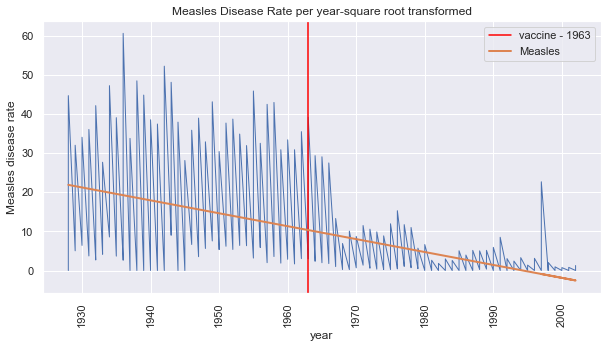

In [29]:
#measles

fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=measles, y="sqrt disease rate", x="year", estimator=None, lw=1)
ax.axvline(1963, *ax.get_ylim(), c = 'red', label = 'vaccine - 1963')
ax.plot(measles['year'],fitline,lw = 2, label = 'Measles')
plt.ylabel('Measles disease rate')
plt.title('Measles Disease Rate per year-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

In [30]:
#p-value for measles disease
print("p_value = ",p_value, "  slope = ", slope)

p_value =  0.0   slope =  -0.32995510910124887


Comments: We have p_value = 0.0 (p< 0.05) and we have a negative slope which shows the positive effectiveness of vaccine. We go ahead for 'Hepatitis A' 

In [31]:
df2.head()

,disease,state,year,weeks_reporting,count,population
1,Hepatitis A,Alabama,1966,50,321,3345787.0
2,Hepatitis A,Alabama,1967,49,291,3364130.0
3,Hepatitis A,Alabama,1968,52,314,3386068.0
4,Hepatitis A,Alabama,1969,49,380,3412450.0
5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [32]:
df2.isnull().any()

disease            False
state              False
year               False
weeks_reporting    False
count              False
population         False
dtype: bool

In [33]:
df2['sqrt disease rate'] = (((df2['count']/df2['weeks_reporting'])*52)/(df2['population']/100000))**0.5
df2.head()

C:\Users\godfr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,disease,state,year,weeks_reporting,count,population,sqrt disease rate
1,Hepatitis A,Alabama,1966,50,321,3345787.0,3.158785
2,Hepatitis A,Alabama,1967,49,291,3364130.0,3.029798
3,Hepatitis A,Alabama,1968,52,314,3386068.0,3.045208
4,Hepatitis A,Alabama,1969,49,380,3412450.0,3.437655
5,Hepatitis A,Alabama,1970,51,413,3444165.0,3.496630


In [34]:
#data for hepatitis

hepaA = df2.query("disease == 'Hepatitis A'")
hepaA.head()

,disease,state,year,weeks_reporting,count,population,sqrt disease rate
1,Hepatitis A,Alabama,1966,50,321,3345787.0,3.158785
2,Hepatitis A,Alabama,1967,49,291,3364130.0,3.029798
3,Hepatitis A,Alabama,1968,52,314,3386068.0,3.045208
4,Hepatitis A,Alabama,1969,49,380,3412450.0,3.437655
5,Hepatitis A,Alabama,1970,51,413,3444165.0,3.496630


Let's see the state trend for Hepatitis A on heatmap plot. It's vaccine was developed around 1995-A vertical blue line drawn  

In [35]:
hepa = hepaA.pivot("state","year","sqrt disease rate").fillna(0)
hepa.head()

year,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
state,,,,,,,,,,,,,,,,,,,,,
Alabama,3.158785,3.029798,3.045208,3.437655,3.496630,3.327060,3.348552,3.887284,2.790636,2.967557,...,0.924756,0.582508,0.406753,0.901147,0.671808,0.679432,0.474033,0.472604,0.413104,0.529510
Arizona,5.239312,5.114291,5.157732,5.719776,6.009761,7.050351,6.244038,4.351178,5.100318,4.559278,...,2.555199,2.245669,2.089723,2.138266,1.172861,1.658041,1.346736,1.114803,1.104659,0.562312
Arkansas,4.046522,4.206255,3.488018,3.907413,3.694214,3.691946,3.969478,2.862256,4.765292,4.528744,...,1.421633,0.942359,1.451289,0.844862,1.014043,0.674472,0.448090,0.451643,0.000000,0.000000
California,5.673872,6.302371,7.503435,6.931235,7.007816,6.952188,6.208394,5.898150,5.310621,4.917322,...,2.047454,1.840800,1.557395,1.644058,1.384914,0.937272,0.960135,0.804756,0.756686,0.704730
Colorado,3.968685,4.161303,6.415765,5.743838,7.250929,6.052406,5.688140,4.723241,3.761284,3.254848,...,1.377101,1.230864,1.206306,1.049024,0.729047,0.746932,0.743734,1.012399,0.838507,0.600657


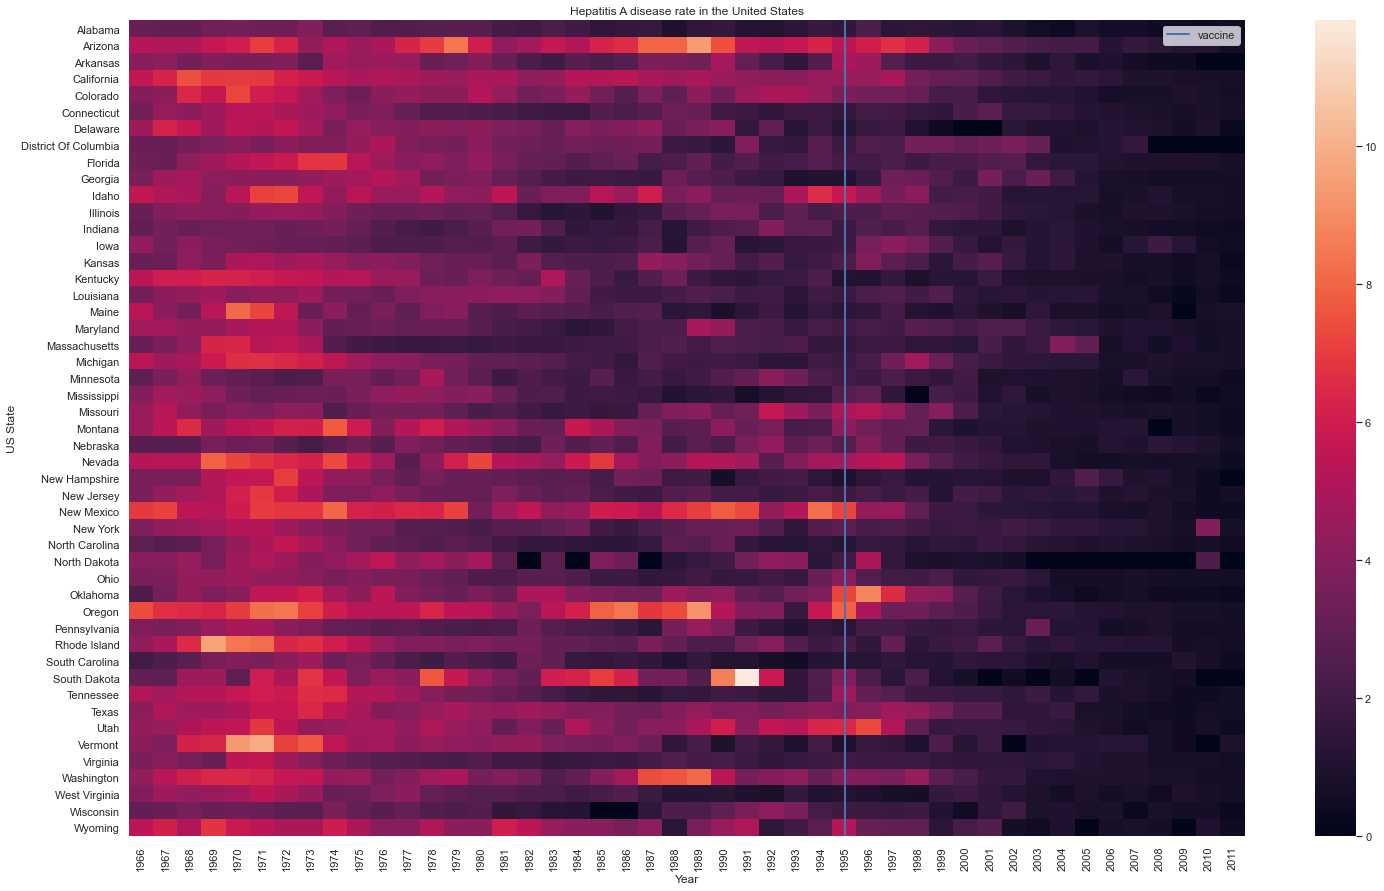

In [36]:
f, ax = plt.subplots(figsize=(25, 15))
ax=sns.heatmap(hepa, annot=False, fmt="d", linewidths=0, ax=ax)
ax.set(xlabel="Year", ylabel="US State", title = "Hepatitis A disease rate in the United States")
ax.axvline([29.5],*ax.get_ylim(),lw=2, label = 'vaccine')
plt.legend()
plt.show()

We observe how the Hepatitis A disease rate varied across US states. Beyond 1995 the effect of vaccination appeared, states like Alabama, south Carolina,Delaware, etc showed a great achievements on vaccination. Let's plot a line plot to see how the rate changed with years.

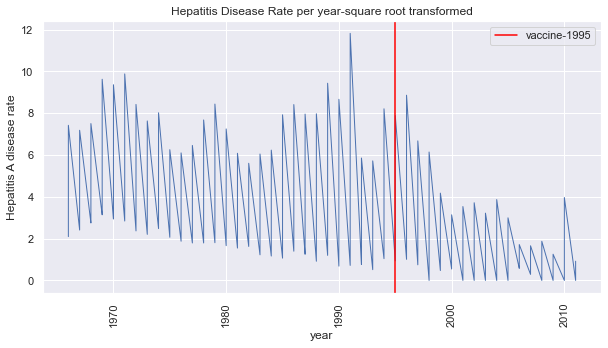

In [37]:
fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=hepaA, y="sqrt disease rate", x="year", estimator=None, lw=1)
ax.axvline(1995, *ax.get_ylim(), c = 'red', label = 'vaccine-1995')
plt.ylabel('Hepatitis A disease rate')
plt.title('Hepatitis Disease Rate per year-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

From the line plot, beyond 1995 there were a decrease in Heaptitis A total cases due to vaccination.Let's fit a line to calculate the p_value of the data. we use the previous defined function, linear()

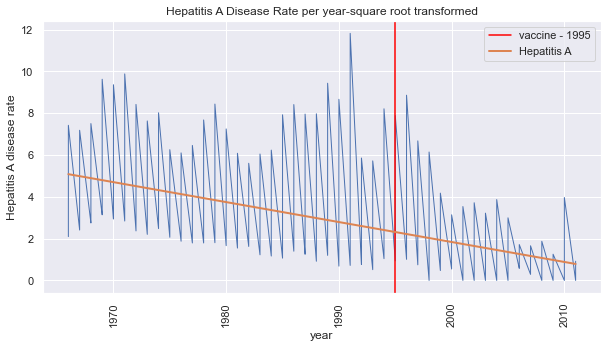

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(hepaA['year'],hepaA['sqrt disease rate'])
fit_h = linear(hepaA['year'])

fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=hepaA, y="sqrt disease rate", x="year", estimator=None, lw=1)
ax.axvline(1995, *ax.get_ylim(), c = 'red', label = 'vaccine - 1995')
ax.plot(hepaA['year'],fit_h,lw = 2, label = 'Hepatitis A')
plt.ylabel('Hepatitis A disease rate')
plt.title('Hepatitis A Disease Rate per year-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

In [39]:
#p-value for Hepatitis A disease
print("p_value = ",p_value, "  slope = ", slope)

p_value =  0.0   slope =  -0.09545253016720832


Comments: We have p_value = 0.0 (p< 0.05) and we have a negative slope which shows the positive effectiveness of Hepatitis A vaccine. We go ahead for 'Mumps' 

In [40]:
#data for Mumps

mumps = df2.query("disease == 'Mumps'")
mumps.head()

,disease,state,year,weeks_reporting,count,population,sqrt disease rate
6172,Mumps,Alabama,1968,44,548,3386068.0,4.373386
6173,Mumps,Alabama,1969,37,234,3412450.0,3.104385
6174,Mumps,Alabama,1970,51,392,3444165.0,3.406573
6175,Mumps,Alabama,1971,51,1025,3481798.0,5.478690
6176,Mumps,Alabama,1972,50,849,3524543.0,5.005173


Let's see the state trend for Mumps on heatmap plot. It's vaccine was developed around 1969-A vertical blue line drawn 

In [41]:
mum = mumps.pivot("state","year","sqrt disease rate").fillna(0)
mum.head()

year,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
state,,,,,,,,,,,,,,,,,,,,,
Alabama,4.373386,3.104385,3.406573,5.478690,5.005173,4.736630,4.196235,3.512710,3.232895,2.818252,...,0.751570,0.705974,0.224355,0.413285,0.453220,0.476838,0.543401,0.312157,0.000000,0.223449
Arizona,11.227783,11.409724,7.613393,8.310772,7.283034,2.951767,0.000000,0.000000,0.000000,0.000000,...,0.757610,1.928964,0.404043,0.163941,1.056541,0.371184,0.801890,0.429274,0.181215,0.000000
Arkansas,2.017537,3.792001,3.028043,2.926906,3.433200,4.110126,3.067658,2.956640,1.996345,2.819167,...,0.442067,0.638786,0.784432,0.370713,0.000000,0.948779,0.000000,0.487038,0.219156,0.000000
California,9.467212,6.458641,5.640021,6.139622,5.984839,5.251224,3.488993,4.149752,2.834706,1.965373,...,0.740522,0.691588,0.806518,0.582983,0.609327,0.466727,0.413325,0.439814,0.338839,0.450380
Colorado,12.038219,6.576477,8.420621,8.422197,6.066682,5.061643,4.994778,5.144710,3.309950,3.406598,...,0.651864,0.372089,0.257272,0.340140,0.283300,0.572374,0.363182,0.301116,0.339529,0.268973


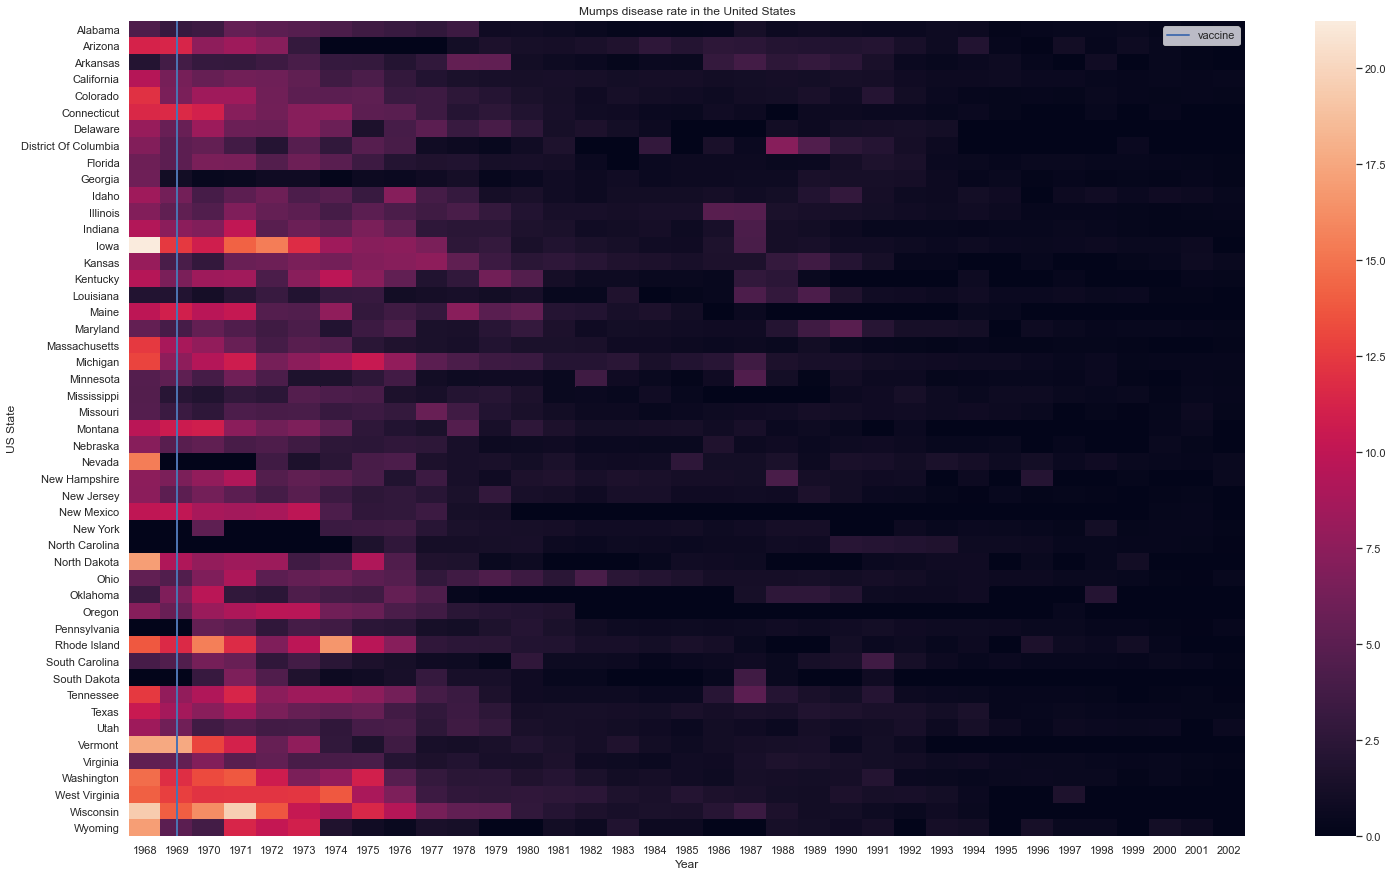

In [42]:
f, ax = plt.subplots(figsize=(25, 15))
ax=sns.heatmap(mum, annot=False, fmt="d", linewidths=0, ax=ax)
ax.set(xlabel="Year", ylabel="US State", title = "Mumps disease rate in the United States")
ax.axvline([1.5],*ax.get_ylim(),lw=2, label = 'vaccine')
plt.legend()
plt.show()

The vaccine was introduced on 1969,As the years increased the effect of vaccine was noticed especially from the late 1970's. Let's observe in a line plot.

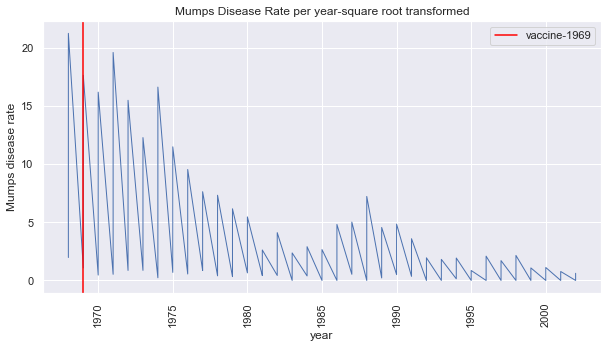

In [43]:
fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=mumps, y="sqrt disease rate", x="year", estimator=None, lw=1)
ax.axvline(1969, *ax.get_ylim(), c = 'red', label = 'vaccine-1969')
plt.ylabel('Mumps disease rate')
plt.title('Mumps Disease Rate per year-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

From the line plot, there were a decrease in Mumps total cases due to vaccination in the late 1970s. Mumps virus was isolated in 1945, and an inactivated vaccine was developed in 1948. This vaccine produced only short-lasting immunity, and its use was discontinued in the mid-1970s. The currently used mumps virus vaccine was licensed in December 1967. https://www.cdc.gov/vaccines/pubs/pinkbook/mumps.html The vaccine was recommended for routine use in the United States in 1977.Let's fit a line to calculate the p_value of the data. we use the previous defined function, linear()

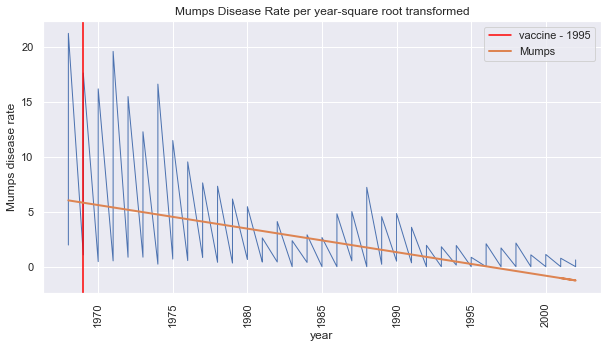

In [44]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mumps['year'],mumps['sqrt disease rate'])
fit_m = linear(mumps['year'])

fig = plt.figure(figsize = (10,5))
ax = sns.lineplot(data=mumps, y="sqrt disease rate", x="year", estimator=None, lw=1)
ax.axvline(1969, *ax.get_ylim(), c = 'red', label = 'vaccine - 1995')
ax.plot(mumps['year'],fit_m,lw = 2, label = 'Mumps')
plt.ylabel('Mumps disease rate')
plt.title('Mumps Disease Rate per year-square root transformed')
_=plt.xticks(rotation = 'vertical')
plt.legend()

In [45]:
#p-value for mumps disease
print("p_value = ",p_value, "  slope = ", slope)

p_value =  5.056207816545007e-213   slope =  -0.21434896493836475


Comments: We have p_value = 0.0 (p< 0.05) and we have a negative slope which shows the positive effectiveness of Mumps vaccine.

Three diseases were analysed; Measles,Hepatitis A and Mumps. Both of them had a negative slope when the best line was fitted using linear regression techniques. p_value was 0 (p<0.05) which proves that diseases rate decreased after the proper vaccination was introduced.